In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import scipy.linalg as linalg

In [2]:
# mean parameters
cluster_means = np.array([[+2.5, +2.5], 
                        [-2.5, +2.5], 
                        [-2.5, -2.5],
                        [+2.5, -2.5],
                        [+0.0, +0.0]])
# covariance parameters
cluster_covariances = np.array([[[+0.8, -0.6], 
                               [-0.6, +0.8]],
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]],
                              [[+0.8, -0.6], 
                               [-0.6, +0.8]],
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]],
                              [[+1.6, +0.0], 
                               [+0.0, +1.6]]])
# sample sizes
cluster_sizes = np.array([50, 50, 50, 50, 100])

In [3]:
# read data into memory
data_set = np.genfromtxt("hw08_data_set.csv", delimiter = ",")

In [4]:
X = data_set
N = X.shape[0]
delta = 1.25

In [5]:
D = spa.distance_matrix(X, X)
B = np.zeros((N, N)).astype(int)
B[D < delta] = 1
for i in range(N):
    B[i, i] = 0

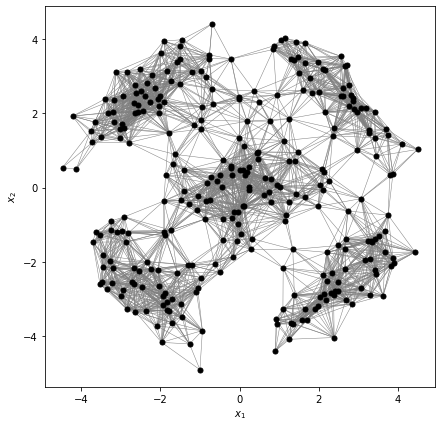

In [6]:
fig = plt.figure(figsize = (7, 7))

for i in range(N):
    for j in range(N - i):
        if B[i][j+i] == 1:
            x_vals = [X[i, 0], X[j+i, 0]]
            y_vals = [X[i, 1], X[j+i, 1]]
            plt.plot(x_vals, y_vals, "-", linewidth = 0.5, color = "grey")

plt.plot(X[:, 0], X[:, 1], ".", markersize = 10, color = "black")
plt.plot
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [7]:
D = np.diag(np.sum(B, axis = 0))

D_inv2 = np.sqrt(linalg.cho_solve(linalg.cho_factor(D), np.eye(N)))
L_symmetric = np.eye(N) - np.matmul(D_inv2, np.matmul(B, D_inv2))

In [8]:
eigenvalues, eigenvectors = linalg.eig(L_symmetric)

R = 5
r_smallest = np.argsort(eigenvalues)[1:(R+1)]

Z = eigenvectors[:, r_smallest]

In [9]:
# cluster number
K = 5

In [10]:
def update_centroids(memberships, X):
    # update centroids
    centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

In [11]:
indices = [28, 142, 203, 270, 276]
centroids = Z[indices]
memberships = update_memberships(centroids, Z)

In [12]:
iteration = 1
while True:
    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break

    iteration = iteration + 1

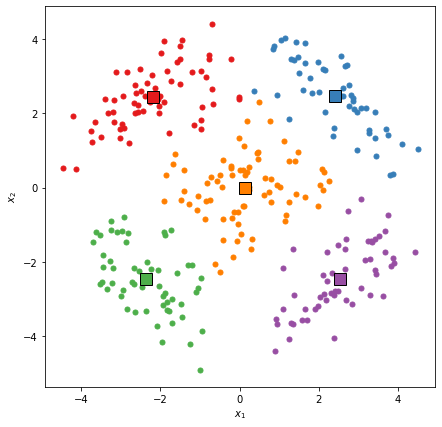

In [13]:
cluster_colors = np.array(["#377eb8", "#4daf4a", "#e41a1c", "#ff7f00", "#984ea3"])
means = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])

fig = plt.figure(figsize = (7, 7))

for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10, color = cluster_colors[c])
    plt.plot(means[c, 0], means[c, 1], "s", markersize = 12, markerfacecolor = cluster_colors[c], markeredgecolor = "black")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()